# Data Cleaning and Outlier Analysis  
## King County Housing Sales Dataset

**Objective:**  
This notebook demonstrates basic data cleaning techniques, missing-value handling, and outlier detection using the King County housing sales dataset. The analysis includes data exploration, cleaning, and visualization of potential outliers in housing prices.

**Dataset:**  
House Sales in King County, USA (Kaggle)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("default")

### Libraries Used
- **pandas** for data manipulation and cleaning  
- **numpy** for numerical operations  
- **matplotlib** and **seaborn** for data visualization

In [4]:
# Load the dataset
df = pd.read_csv("kc_house_data.csv")

# Basic inspection
print("Dataset shape:", df.shape)
display(df.head())

# Structure and missing values
df.info()

Dataset shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<class 'pandas.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  str    
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long           21

## Data Loading and Initial Inspection

The dataset was loaded from a CSV file and inspected for structure and completeness.
Items examined include:
- The number of rows and columns
- The first few records
- Column data types and non-null counts

This initial inspection helps identify missing values and columns that may require cleaning or type conversion.

In [5]:
# Summary statistics for numeric columns
display(df.describe())

# Missing values per column
print("\nMissing values by column:")
display(df.isna().sum().sort_values(ascending=False))

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



Missing values by column:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Number of duplicate rows: 0


## Exploratory Data Analysis

This section explores the structure and quality of the dataset.

- Summary statistics were examined to identify extreme values and unusual ranges.
- Missing values were counted to determine appropriate cleaning strategies.
- Duplicate records were checked to ensure data consistency.

The exploration indicates the presence of potential outliers, particularly in housing prices and living area size.

In [6]:
# --- Handle missing values ---
# Check missing values again (this is mostly a sanity check)
df.isna().sum()

# Strategy:
# - This dataset typically has very few missing values
# - We will drop rows with missing values for simplicity and data integrity
df = df.dropna()

# --- Convert date column to datetime ---
df['date'] = pd.to_datetime(df['date'])

# --- Remove duplicate rows (if any) ---
df = df.drop_duplicates()

# Verify changes
print("Dataset shape after cleaning:", df.shape)
df.info()

Dataset shape after cleaning: (21613, 21)
<class 'pandas.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[us]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64   

## Data Cleaning

Data cleaning steps were applied to improve data quality and consistency.

- Rows with missing values were removed due to the small number of missing entries.
- The `date` column was converted to a datetime format for consistency.
- Duplicate records were removed to ensure data integrity.

After cleaning, the dataset was rechecked to confirm the changes.

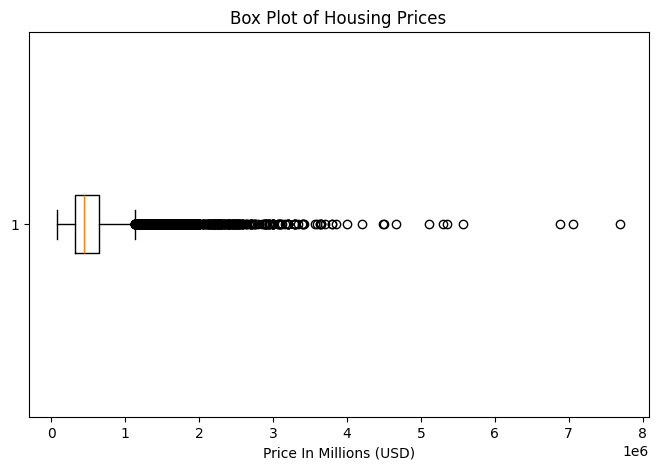

In [9]:
# Box plot
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'], vert=False)
plt.title("Box Plot of Housing Prices")
plt.xlabel("Price In Millions (USD)")
plt.show()

In [8]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
outliers = df[df['price'] > upper_limit]

print("Number of price outliers:", outliers.shape[0])

Number of price outliers: 1146


## Outlier Analysis

A box plot was used to visualize outliers in housing prices.
Several high-priced homes were identified above the upper IQR threshold.
These outliers were retained, as they likely represent legitimate luxury properties rather than data errors.

## Summary

- The King County housing dataset was explored and cleaned for analysis.
- Missing values and duplicate records were removed.
- Outliers in housing prices were identified using box plots and the IQR method.
- High-priced outliers were retained, as they reflect real market behavior.

This notebook demonstrates fundamental data cleaning and outlier detection techniques using real-world data.